In [41]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [42]:
from tensorflow.keras.layers import Convolution2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten

In [43]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [44]:
train_datagen=ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True,vertical_flip=True)

In [45]:
test_datagen=ImageDataGenerator(rescale=1./255)

In [46]:
x_train=train_datagen.flow_from_directory(r"C:\Users\91949\Desktop\IBM\DATA SET\Flowers-Dataset\train",target_size=(64,64),batch_size=32,class_mode="categorical")

Found 3350 images belonging to 5 classes.


In [47]:
x_test=test_datagen.flow_from_directory(r"C:\Users\91949\Desktop\IBM\DATA SET\Flowers-Dataset\test",target_size=(64,64),batch_size=32,class_mode="categorical")

Found 967 images belonging to 5 classes.


In [48]:
x_train.class_indices

{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

In [49]:
model=Sequential()

In [50]:
model.add(Convolution2D(32,(3,3),input_shape=(64,64,3),activation='relu'))

In [51]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [52]:
model.add(Flatten())

In [53]:
model.add(Dense(units=300,kernel_initializer="random_uniform",activation="relu"))

In [54]:
model.add(Dense(units=5,kernel_initializer="random_uniform",activation="softmax"))

In [55]:
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

In [56]:
model.fit_generator(x_train,steps_per_epoch=104,epochs=25,validation_data=x_test,validation_steps=30)

<ipython-input-56-ffe857803cc3>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(x_train,steps_per_epoch=104,epochs=25,validation_data=x_test,validation_steps=30)


Epoch 1/25
104/104 [==============================] - 38s 362ms/step - loss: 1.3654 - accuracy: 0.4342 - val_loss: 1.3903 - val_accuracy: 0.4375
Epoch 2/25
104/104 [==============================] - 24s 230ms/step - loss: 1.0937 - accuracy: 0.5621 - val_loss: 1.3275 - val_accuracy: 0.4844
Epoch 3/25
104/104 [==============================] - 25s 243ms/step - loss: 1.0205 - accuracy: 0.5913 - val_loss: 1.2193 - val_accuracy: 0.5583
Epoch 4/25
104/104 [==============================] - 22s 215ms/step - loss: 0.9656 - accuracy: 0.6136 - val_loss: 1.1953 - val_accuracy: 0.5573
Epoch 5/25
104/104 [==============================] - 23s 225ms/step - loss: 0.9131 - accuracy: 0.6417 - val_loss: 1.4243 - val_accuracy: 0.4990
Epoch 6/25
104/104 [==============================] - 23s 224ms/step - loss: 0.8773 - accuracy: 0.6621 - val_loss: 1.4136 - val_accuracy: 0.5125
Epoch 7/25
104/104 [==============================] - 21s 201ms/step - loss: 0.8715 - accuracy: 0.6624 - val_loss: 1.1761 - val_ac

In [57]:
from tensorflow.keras.models import load_model

In [58]:
model.save("flowers.h5")

In [59]:
from tensorflow.keras.preprocessing import image 

In [60]:
import numpy as np

In [61]:
model=load_model("flowers.h5")

In [63]:
img=image.load_img("sunflower.jpg",target_size=(64,64))

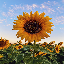

In [64]:
img

In [65]:
x=image.img_to_array(img)

In [66]:
x=np.expand_dims(x,axis=0)

In [67]:
pred_prob=model.predict(x)

1/1 [==============================] - 0s 115ms/step


In [68]:
class_name=["daisy","dandelion","rose","sunflower","tulip"]
pred_id=pred_prob.argmax(axis=1)[0]

In [70]:
print("predicted flower :",str(class_name[pred_id]))

predicted flower : sunflower
